
# 2023-07-11-ChatGPT Tutorial
**Presenter: Guanqun (David) Yang, PhD. Candidate @ Stevens CS**

In [ ]:
! pip install datasets --quiet
! pip install langchain --quiet
! pip install openai --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 3.2 MB/s eta 0:00:00


In [ ]:
import requests

from bs4 import BeautifulSoup
from datasets import load_dataset
from langchain.llms import OpenAI


openai_api_key = "<ENTER YOUR API KEY HERE>"

def get_web_text(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "lxml")

    return soup.get_text()

# Use Case 1: Grammar Error Correction


In [ ]:
dataset = load_dataset("jfleg", split="test")

Extracting data files:   0%|          | 0/5 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/5 [00:00<?, ?it/s]

Generating validation split:   0%|          | 0/755 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/748 [00:00<?, ? examples/s]

Dataset jfleg downloaded and prepared to /root/.cache/huggingface/datasets/jfleg/default/1.0.0/ed4ab2367351fe31949f48849ae6732b164f0d5ea6bb5d4357ff4293ac89511b. Subsequent calls will reuse this data.


In [ ]:
wrong_sentence = dataset[0]["sentence"]
corrections = dataset[0]["corrections"]

In [ ]:
wrong_sentenc

'New and new technology has been introduced to the society .'

In [ ]:
# initializing ChatGPT
llm = OpenAI(
    model_name="text-davinci-003",
    temperature=0.9,
    max_tokens=32,
    openai_api_key=openai_api_key,
)

text_input_template = "Incorrect sentence: {text}\nCorrect sentence:"
text_input = text_input_template.format(text=wrong_sentence)
response = llm(text_input)

print(text_input)
print()
print(wrong_sentence)
print()
print(response)

Incorrect sentence: New and new technology has been introduced to the society .
Correct sentence:

New and new technology has been introduced to the society .

 New and advanced technology has been introduced to society.


# Use Case 2: Solving a SAT Math Problem and Failure Mode
The question is taken from P210 of the [official guide](https://satsuite.collegeboard.org/media/pdf/official-sat-study-guide-problem-solving-data-analysis.pdf). The question reads:
> On Thursday, 240 adults and children attended a show. The ratio of adults to children was 5 to 1. How many children attended the show?

There should be $240 \times \frac{1}{6} = 40$ children.

In [ ]:
# initializing ChatGPT
llm = OpenAI(
    model_name="text-davinci-003",
    temperature=0.9,
    max_tokens=128,
    openai_api_key=openai_api_key,
)

question = "On Thursday, 240 adults and children attended a show. The ratio of adults to children was 5 to 1. How many children attended the show?"
text_input_template = "Question: {question}\nLet's think step by step."
text_input = text_input_template.format(question=question)
answer = llm(text_input)

print(answer)



First, we need to find out how many children attended the show.

Second, we need to figure out the ratio of adults to children. The ratio is 5 to 1 which means for every 5 adults there is one child.

Third, we need to calculate the number of children attending the show. To do this, we can divide the total number of attendees (240) by the ratio (5 to 1), which gives us a result of 48 children.

Therefore, the answer is that 48 children attended the show.


# Use Case 3: Asking Questions on Long and Tedious Terms and Conditions
**Description**
AMC Theaters requires its members to pay for its membership for at least 3 months before they could cancel it. However, many customers (including me) is not aware of this because this rule hidden deeply in its [terms and conditions](https://www.amctheatres.com/amcstubs/alist/terms-and-conditions).
**Goal**
Using ChatGPT to read the terms and conditions for us and provide us the relevant information.

In [ ]:
# loading terms and conditions of AMC Theaters
url = "https://www.amctheatres.com/amcstubs/alist/terms-and-conditions"
terms_and_condition_text = get_web_text(url)[:4000]

In [ ]:
print(terms_and_condition_text)













AMC Stubs A-List Terms and Conditions








 














Show off your love for the movies with our NEW Summer Gear. Shop NowSee a MovieFind a TheatreFood & DrinksMore ShowtimesAMC StubsSign In or Join NowFind A Theatre Near YouAMC Entertainment Visa CardGift CardsOffersDiscountsMerchandiseOn DemandShowtimesSign InTicketsRewardsAMC StubsProfileWalletHistoryRemindersOn Demand LibraryOn Demand Watch ListSign OutMain MenuFind A Theatre Near YouSign InJoin NowMy Tickets & RewardsSee a MovieFind a TheatreFood & DrinksMoreAMC Entertainment Visa CardGift CardsOffersDiscountsMerchandiseOn Demand

AMC Stubs® A-List™ Terms and Conditions
Join Now


Effective Date: November 1, 2022
AMC STUBS A-LIST IS A CONTINUOUS SERVICE MEMBERSHIP TIER OF THE AMC STUBS PROGRAM THAT HAS AN INITIAL NON-CANCELABLE TERM OF THREE MONTHLY MEMBERSHIP PERIODS (THE "INITIAL COMMITMENT") AND THEREAFTER CONTINUES UNTIL CANCELLED BY YOU OR US. AFTER THE INITIAL COMMITMENT, YOU MAY CANCEL ONLINE BY NAVIGATI

In [ ]:
# initializing ChatGPT
llm = OpenAI(
    model_name="text-davinci-003",
    temperature=0.9,
    max_tokens=64,
    openai_api_key=openai_api_key,
)


questions = [
    "What is the minimal commitment period?",
    "How much money do I have to spend each month if I would like to watch a movie in both New Jersey and New York City?"
]

text_input_template = """{text}
Question: {question}
Answer:
"""

In [ ]:
for question in questions:
    text_input = text_input_template.format(text=terms_and_condition_text, question=question)
    answer = llm(text_input)

    print(answer)


The minimal commitment period for AMC Stubs A-List is three monthly membership periods. After the initial commitment, you may cancel online by navigating to the Manage My Plan section on the AMC Theatres mobile app or website. Your cancellation will be effective at the end of the current membership period.
If you would like to watch a movie in both New Jersey and New York City, you would need to spend $22.95 per month for an A-List membership. This is valid for use at AMC’s theatres in all states except California, Connecticut, Massachusetts, New Jersey, and New York.


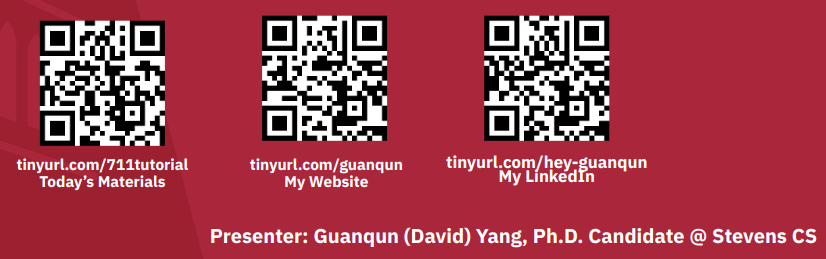